# This program is for practic and plotting model
## in this program I used make_moons and Logistic Regresstion & Deep Neural Net
### plotted both model

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import keras
import os

Using TensorFlow backend.


In [2]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

(1000, 2)

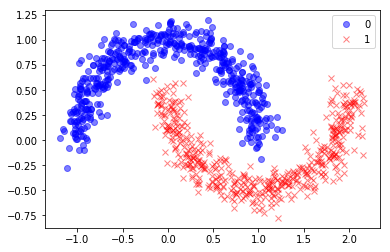

In [3]:
X,y = make_moons(n_samples=1000, noise=0.1)
plt.plot(X[y==0,0],X[y==0,1],'ob',alpha = 0.5)
plt.plot(X[y==1,0],X[y==1,1],'xr',alpha = 0.5)
plt.legend(['0','1'])
X.shape

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.3,
                                                   random_state = 42)

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

In [6]:
model = Sequential()
model.add(Dense(1,input_shape=(2,),activation='sigmoid'))
model.compile(Adam(0.01),'binary_crossentropy',metrics=['accuracy'])

In [12]:
model.fit(X_train,y_train,epochs=100, verbose=0)

In [13]:
result = model.evaluate(X_test,y_test,verbose=1)

300/300 [==============================] - 0s 33us/step


In [14]:
print("the accuracy is {:0.3f}".format(result[1]))

the accuracy is 0.893


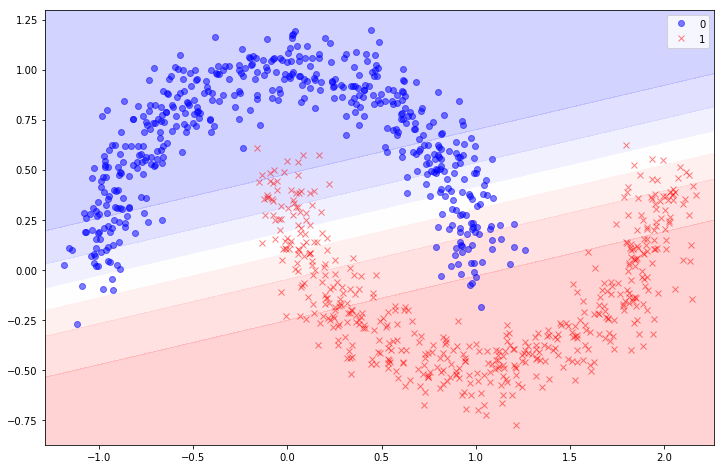

In [15]:
def plot_decision_boundary(model,X,y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb. ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)
    
    plt.figure(figsize=(12,8))
    plt.contourf(aa,bb,cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0,0],X[y==0,1],'ob',alpha = 0.5)
    plt.plot(X[y==1,0],X[y==1,1],'xr',alpha = 0.5)
    plt.legend(['0','1'])

plot_decision_boundary(model,X,y)

In [16]:
deep_model = Sequential()
deep_model.add(Dense(4, input_shape=(2,), activation='tanh',name='layer1'))
deep_model.add(Dense(3,activation='tanh',name='layer2'))
deep_model.add(Dense(1,activation='sigmoid',name='outputLayer'))
deep_model.compile(Adam(0.01), 'binary_crossentropy', metrics=['accuracy'])
deep_model.summary

<bound method Network.summary of <keras.engine.sequential.Sequential object at 0x000002027B417CF8>>

In [17]:
logger = keras.callbacks.TensorBoard(
                        log_dir="logsPlotting",
                        write_graph=True,
                        histogram_freq=5)

In [18]:
deep_model.fit(X_train,y_train,epochs=50, shuffle=True,verbose=1,callbacks=[logger], validation_data=(X_test,y_test))

Train on 700 samples, validate on 300 samples
Epoch 1/50
700/700 [==============================] - 0s 411us/step - loss: 0.6230 - acc: 0.6357 - val_loss: 0.5438 - val_acc: 0.7733
Epoch 2/50
700/700 [==============================] - 0s 59us/step - loss: 0.4894 - acc: 0.7800 - val_loss: 0.4163 - val_acc: 0.8533
Epoch 3/50
700/700 [==============================] - 0s 51us/step - loss: 0.3898 - acc: 0.8414 - val_loss: 0.3202 - val_acc: 0.8833
Epoch 4/50
700/700 [==============================] - 0s 51us/step - loss: 0.3229 - acc: 0.8686 - val_loss: 0.2698 - val_acc: 0.8933
Epoch 5/50
700/700 [==============================] - 0s 64us/step - loss: 0.2913 - acc: 0.8871 - val_loss: 0.2468 - val_acc: 0.8933
Epoch 6/50
700/700 [==============================] - 0s 54us/step - loss: 0.2766 - acc: 0.8900 - val_loss: 0.2344 - val_acc: 0.8933
Epoch 7/50
700/700 [==============================] - 0s 49us/step - loss: 0.2606 - acc: 0.8971 - val_loss: 0.2320 - val_acc: 0.8967
Epoch 8/50
700/700 [==

In [19]:
deep_model.evaluate(X_test,y_test,verbose=1)

300/300 [==============================] - 0s 37us/step


[0.00428291205316782, 1.0]

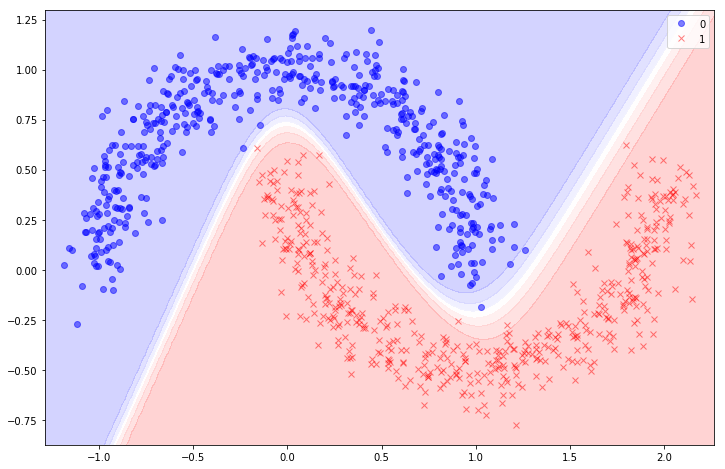

In [20]:
plot_decision_boundary(deep_model,X,y)